# 1. Data preparation

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("wifi_latency.csv")

print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   latency_ms         10000 non-null  float64
 1   rssi_dbm           10000 non-null  int64  
 2   snr_db             10000 non-null  int64  
 3   band               10000 non-null  object 
 4   channel_util%      10000 non-null  int64  
 5   num_assoc_devices  10000 non-null  int64  
 6   client_speed_mbps  10000 non-null  int64  
 7   ap_vendor          10000 non-null  object 
 8   protocol           10000 non-null  object 
 9   distance_m         10000 non-null  float64
dtypes: float64(2), int64(5), object(3)
memory usage: 781.4+ KB
None
   latency_ms  rssi_dbm  snr_db     band  channel_util%  num_assoc_devices  \
0       124.6       -62      11  2.4 GHz             45                 13   
1       161.8       -72      51  2.4 GHz             99                 19   
2       111.9

# 2. Data Cleaning


In [ ]:
# duplicate data
duplicate_count = df.duplicated().sum()
print(f"number of duplicate data: {duplicate_count}")

number of duplicate data: 0


number of outliers:  137


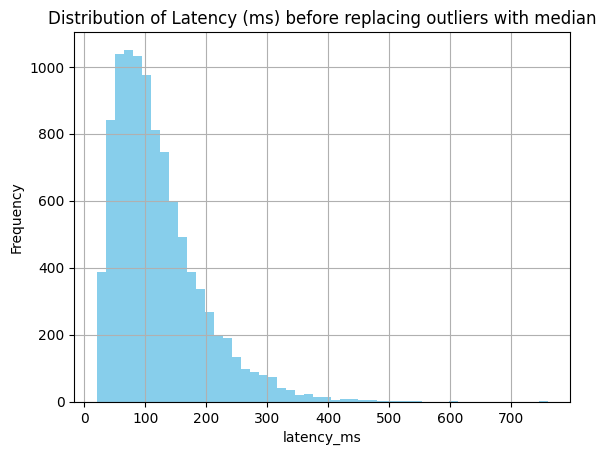

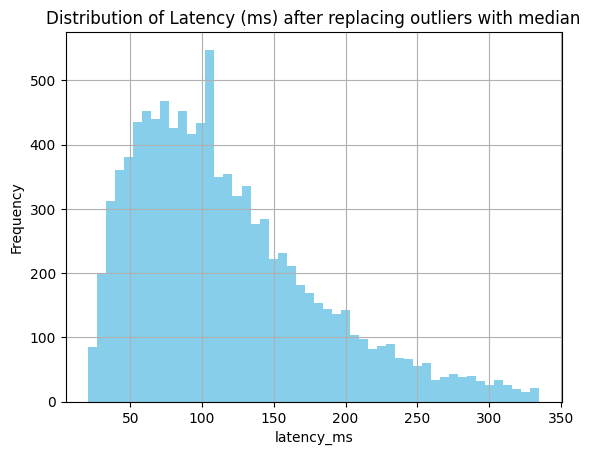

In [ ]:
import matplotlib.pyplot as plt

# outliers
mean_latency = df['latency_ms'].mean()
std_latency = df['latency_ms'].std()
df['z_score'] = (df['latency_ms'] - mean_latency) / std_latency

# outliers would have a z score above 3 or below -3
df['is_outlier_z'] = (df['z_score'].abs() > 3)

print("number of outliers: ", df['is_outlier_z'].sum())

# calculating the median of latency_ms
median_latency = df['latency_ms'].median()

# plotting the histogram before replacement
plt.hist(df['latency_ms'], bins=50, color='skyblue')
plt.title("Distribution of Latency (ms) before replacing outliers with median")
plt.xlabel("latency_ms")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# replacing the outliers with median
df.loc[df['is_outlier_z'], 'latency_ms'] = median_latency

# removing unnecessary columns
df = df.drop(columns=['z_score', 'is_outlier_z'])

# plotting the histogram after replacement
plt.hist(df['latency_ms'], bins=50, color='skyblue')
plt.title("Distribution of Latency (ms) after replacing outliers with median")
plt.xlabel("latency_ms")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# 3. Checking the distribution of latency_m


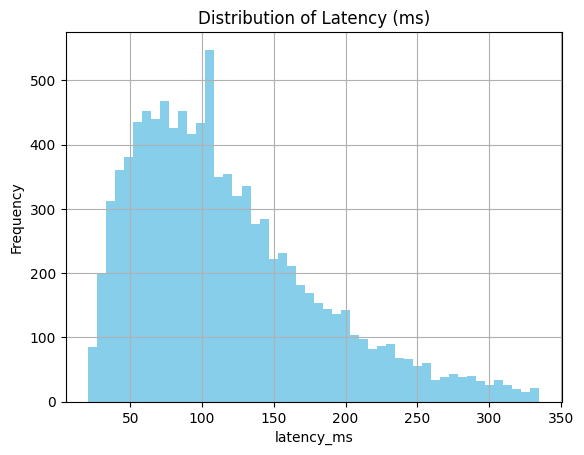

In [ ]:
import matplotlib.pyplot as plt

# Checking the histogram of latency to see the distribution
plt.hist(df['latency_ms'], bins=50, color='skyblue')
plt.title("Distribution of Latency (ms)")
plt.xlabel("latency_ms")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


## Applying a logarithmic transformation to the latency_ms column and creating the latency_log column

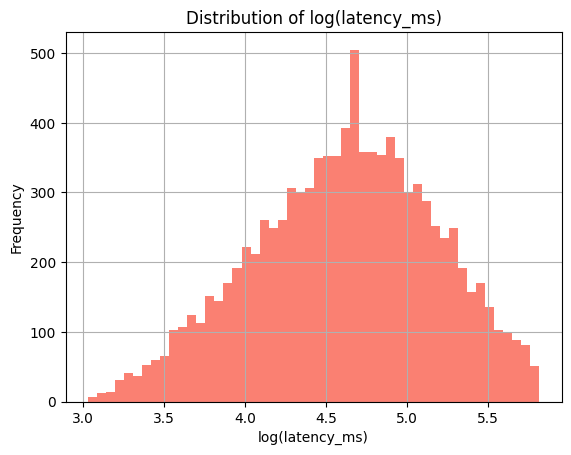

In [ ]:
df['latency_log'] = np.log(df['latency_ms'])

plt.hist(df['latency_log'], bins=50, color='salmon')
plt.title("Distribution of log(latency_ms)")
plt.xlabel("log(latency_ms)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# 4. Manipulation and Transformation


In [ ]:
# normalizing the numeric columns
numeric_cols = ['rssi_dbm', 'snr_db', 'channel_util%', 'num_assoc_devices', 'client_speed_mbps', 'distance_m']

for col in numeric_cols:
  mean = df[col].mean()
  std = df[col].std()
  df[col] = (df[col] - mean) / std

df[[col for col in numeric_cols]].head()

,rssi_dbm,snr_db,channel_util%,num_assoc_devices,client_speed_mbps,distance_m
0,0.067819,-1.302464,-0.177408,-0.233442,-0.946977,1.100386
1,-0.562936,1.491639,1.709164,0.483187,-1.235713,-0.602163
2,-0.247559,-0.883349,-1.260439,0.363749,1.703475,1.572626
3,-0.941390,1.701196,1.080307,-1.547260,-0.946977,0.752420
4,-0.499861,0.723260,-0.631582,0.841501,0.718810,0.690283


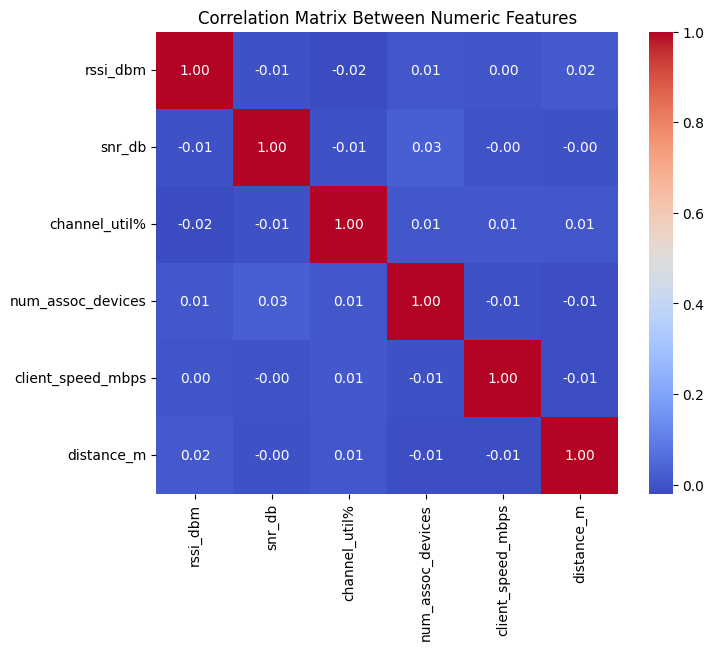

In [ ]:
# Correlation analysis with heatmap
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = ['rssi_dbm', 'snr_db', 'channel_util%', 'num_assoc_devices', 'client_speed_mbps', 'distance_m']

corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Matrix Between Numeric Features")
plt.show()


# 5. Core Task


In [ ]:
# function implementation
def bin_numeric_column(df, col_name, num_bins=6):
  min_val = df[col_name].min()
  max_val = df[col_name].max()
  bin_width = (max_val - min_val) / num_bins

  df[col_name] = ((df[col_name] - min_val) / bin_width).astype(int)
  df[col_name] = df[col_name].clip(upper=num_bins - 1)

  return df

In [ ]:
numeric_cols = ['rssi_dbm', 'snr_db', 'channel_util%', 'num_assoc_devices', 'client_speed_mbps', 'distance_m']

for col in numeric_cols:
    df = bin_numeric_column(df, col)

df = bin_numeric_column(df, 'latency_log')

In [ ]:
df.head()

,latency_ms,rssi_dbm,snr_db,band,channel_util%,num_assoc_devices,client_speed_mbps,ap_vendor,protocol,distance_m,latency_log
0,124.6,3,0,2.4 GHz,2,2,0,Cisco,ax,4,3
1,161.8,2,5,2.4 GHz,5,3,0,Ubiquiti,ac,1,4
2,111.9,2,1,5 GHz,0,3,5,TP‑Link,ac,5,3
3,102.3,1,5,2.4 GHz,4,0,0,TP‑Link,n,4,3
4,174.0,2,4,5 GHz,1,4,3,Ubiquiti,ac,4,4


In [ ]:
# function for calculating MI for each feature
def calculate_mi(df, feature_col, target_col):

    mi = 0

    px = df[feature_col].value_counts(normalize=True).to_dict()
    py = df[target_col].value_counts(normalize=True).to_dict()
    pxy = df.groupby([feature_col, target_col]).size() / N

    for (x, y), p_xy in pxy.items():
        if p_xy > 0:
            p_x = px[x]
            p_y = py[y]
            mi += p_xy * np.log2(p_xy / (p_x * p_y))

    return mi

In [ ]:
feature_columns = ['rssi_dbm', 'snr_db', 'channel_util%', 'num_assoc_devices',
                   'client_speed_mbps', 'distance_m', 'band', 'ap_vendor', 'protocol']

mi_results = []

for col in feature_columns:
    mi = calculate_mi(df, col, 'latency_log')
    mi_results.append((col, mi))

mi_results_sorted = sorted(mi_results, key=lambda x: x[1], reverse=True)


mi_df = pd.DataFrame(mi_results_sorted, columns=['Feature', 'Mutual Information'])

mi_df['Rank'] = range(1, len(mi_df) + 1)

mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)

print(mi_df[['Rank', 'Feature', 'Mutual Information']])


   Rank            Feature  Mutual Information
0     1             snr_db            0.002636
1     2           rssi_dbm            0.002342
2     3  client_speed_mbps            0.002032
3     4         distance_m            0.001585
4     5      channel_util%            0.001343
5     6  num_assoc_devices            0.001054
6     7          ap_vendor            0.000663
7     8           protocol            0.000635
8     9               band            0.000144


# 6. Visualization


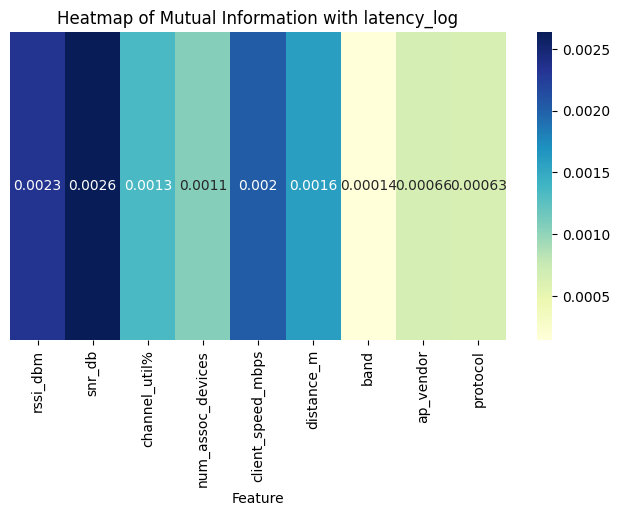

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

mi_df = pd.DataFrame(mi_results, columns=['Feature', 'Mutual Information']).set_index('Feature')

plt.figure(figsize=(8, 4))
sns.heatmap(mi_df.T, annot=True, cmap="YlGnBu", cbar=True)
plt.title("Heatmap of Mutual Information with latency_log")
plt.yticks([])
plt.show()

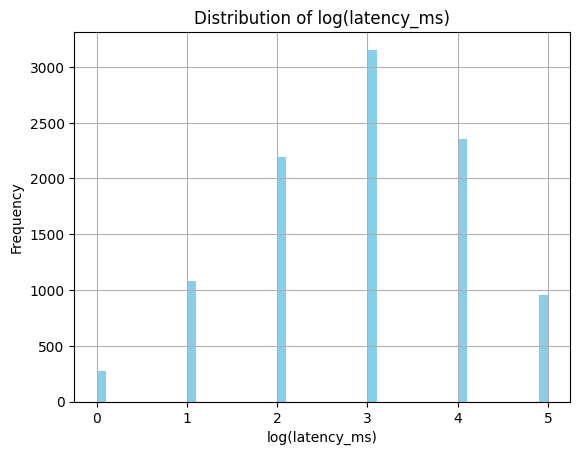

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df['latency_log'], bins=50, color='skyblue')
plt.title("Distribution of log(latency_ms)")
plt.xlabel("log(latency_ms)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


<Figure size 800x600 with 0 Axes>

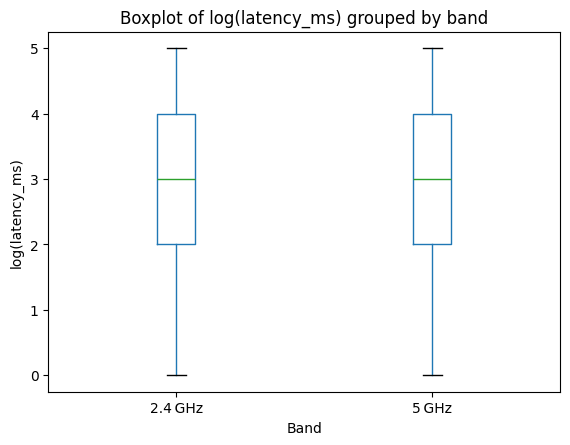

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
df.boxplot(column='latency_log', by='band', grid=False)
plt.title("Boxplot of log(latency_ms) grouped by band")
plt.suptitle("")
plt.xlabel("Band")
plt.ylabel("log(latency_ms)")
plt.show()


# Final processed dataset file

In [ ]:
final_cols = ['latency_log', 'rssi_dbm', 'snr_db', 'channel_util%', 'num_assoc_devices',
              'client_speed_mbps', 'distance_m', 'band', 'ap_vendor', 'protocol']

df_final = df[final_cols]
df_final.to_csv("wifi_latency_processed.csv", index=False)
